<a href="https://colab.research.google.com/github/arecracer/ai_training/blob/main/ai_trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main


In [ ]:
!pip install wget
import wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=6ef3cd01aa853fc6a26e0e3cdebb54bbba21b13b29270d668a9fd550eadb9768
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
shutil.rmtree("/content/Data")

In [ ]:
import sys, os, requests, shutil
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup
print("Starting...")

def scrape(tag,max_page,start_page,folder):
    print("scraping...")
    MAX_PAGE_SEARCH = max_page
    page = start_page

    for ctr in range(1, MAX_PAGE_SEARCH + 1):

        if tag == 'all':
          req = Request('https://danbooru.donmai.us/posts?page=' + str(page))
        else:
          req = Request('https://danbooru.donmai.us/posts?page=' + str(page) +
                      '&tags=' + space_to_underscore(tag), headers={'User-Agent': 'Mozilla/5.0'})

        webpage = urlopen(req).read()

        spage = soup(webpage, "html.parser")
        images = spage.findAll("article")
        print("(Found " + str(len(images)) + " images)")

        folder_path = os.path.join("/content/Data/images/"+folder, tag)
        os.makedirs(folder_path, exist_ok=True)

        print('downloading images...')

        for image in images:
            print(image.img['src'])
            image_url = image.img['src']
            r = requests.get(image_url, stream=True, headers={'User-agent': 'Mozilla/5.0'})

            if r.status_code == 200:
                filename = os.path.join(folder_path, image_url.split('/')[-1])
                print(filename)

                with open(filename, 'wb') as f:
                    r.raw.decode_content = True
                    shutil.copyfileobj(r.raw, f)
        page += 1

def space_to_underscore(string_):
    return "_".join(string_.split())

Starting...


In [ ]:
from google.colab import files
files.download('Data')

In [ ]:
scrape('all',2,2,"train")

In [ ]:
# data = ["mika_pikazo","lack","shirabi","chigusa_minori","qqqrinkappp","aono3","criis-chan","komatsu eiji","kukie-nyan","konbu_wakame","donguri_suzume","modare","scottie_(phantom2)","xiujia_yihuizi","chigusa_minori"]
data = ["mika_pikazo","lack","shirabi","chigusa_minori","qqqrinkappp"]
# data = ["aono3","criis-chan","komatsu eiji","kukie-nyan","konbu_wakame"]
# data = ["donguri_suzume","modare","scottie_(phantom2)","xiujia_yihuizi","chigusa_minori"]
# data = ["fujima_takuya","ozureiji","komorihikki","jonsun"]
# data = ["komone_ushio","qys3","efe","ririko_(zhuoyandesailaer)","apple_caramel"]

# data = ["mika_pikazo","lack","shirabi","chigusa_minori","qqqrinkappp","aono3","criis-chan","komatsu eiji","kukie-nyan","konbu_wakame","donguri_suzume","modare","scottie_(phantom2)","xiujia_yihuizi","chigusa_minori","fujima_takuya","ozureiji","komorihikki","jonsun","nekoma_hikaru","komone_ushio","qys3","efe","ririko_(zhuoyandesailaer)","apple_caramel"]

for i in data:
  print("Download: "+i)
  scrape(i,10,6,"train")
  scrape(i,1,1,"test")
  scrape(i,4,2,"valid")


Download: mika_pikazo
scraping...
(Found 20 images)
downloading images...
https://cdn.donmai.us/180x180/fc/44/fc44d2725b55feca02fb57e055f664c2.jpg
/content/Data/images/train/mika_pikazo/fc44d2725b55feca02fb57e055f664c2.jpg
https://cdn.donmai.us/180x180/8f/38/8f38596be8af5561daa7c597c88871f4.jpg
/content/Data/images/train/mika_pikazo/8f38596be8af5561daa7c597c88871f4.jpg
https://cdn.donmai.us/180x180/e2/71/e2712eae7c35a04f39400388cca07a9a.jpg
/content/Data/images/train/mika_pikazo/e2712eae7c35a04f39400388cca07a9a.jpg
https://cdn.donmai.us/180x180/cd/c8/cdc88b0ec6e0a9c5549bfcd34725b59a.jpg
/content/Data/images/train/mika_pikazo/cdc88b0ec6e0a9c5549bfcd34725b59a.jpg
https://cdn.donmai.us/180x180/1a/ca/1aca689b23bdab8fefd9c2e251c6a335.jpg
/content/Data/images/train/mika_pikazo/1aca689b23bdab8fefd9c2e251c6a335.jpg
https://cdn.donmai.us/180x180/3f/d4/3fd4fc23e19ebddeb8bd16b39533389f.jpg
/content/Data/images/train/mika_pikazo/3fd4fc23e19ebddeb8bd16b39533389f.jpg
https://cdn.donmai.us/180x180/4b

KeyboardInterrupt: ignored

In [ ]:
!pip install -q fastbook==0.0.29
from fastbook import *

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(valid_name='valid'),
    get_y=parent_label,
    batch_tfms=aug_transforms(size=512),
    item_tfms=Resize(512)
)
dls = dblock.dataloaders('Data/images/', bs=24)

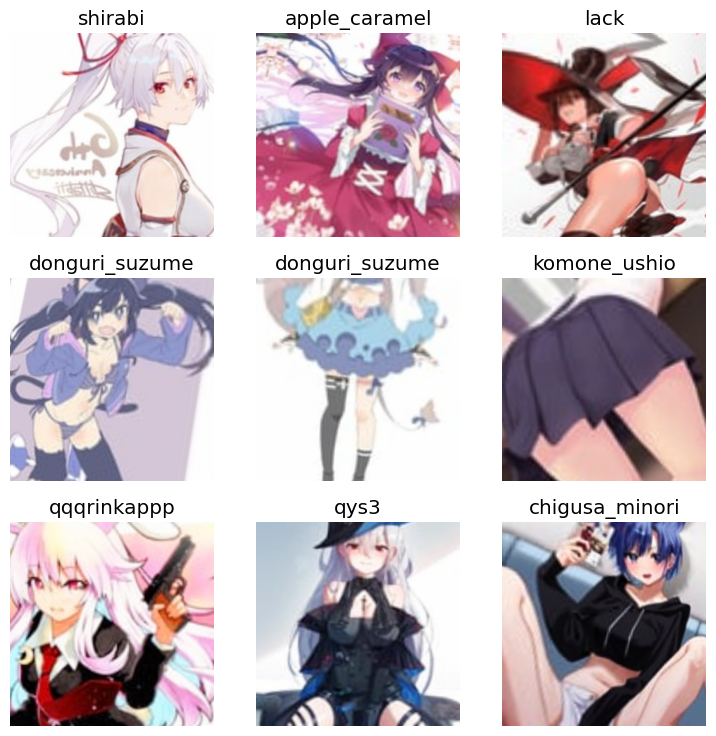

In [ ]:
dls.train.show_batch(max_n=9,nrows=3)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(epochs=20, freeze_epochs=0, base_lr=2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.683915,1.420134,0.593483,00:46
1,1.757286,1.070897,0.696581,00:46
2,1.264436,0.936095,0.741453,00:46
3,0.932520,0.909446,0.771902,00:46
4,0.722882,0.825501,0.791132,00:46
5,0.579752,0.912786,0.787393,00:45
6,0.452717,0.774678,0.817842,00:45
7,0.335699,0.755375,0.819979,00:46
8,0.263191,0.714337,0.840812,00:46
9,0.196573,0.778348,0.824252,00:46


In [ ]:
learn.show_results()

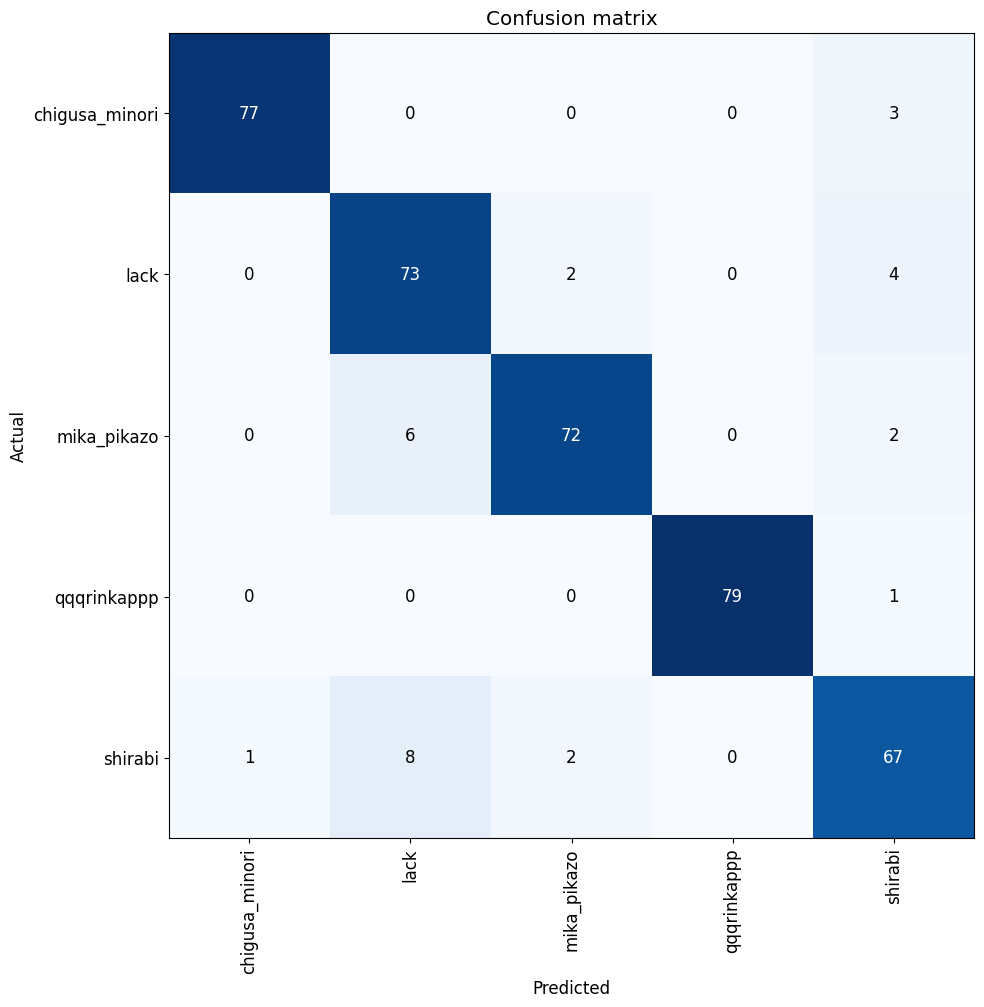

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

In [ ]:
interp.print_classification_report()

                precision    recall  f1-score   support

chigusa_minori       0.99      0.96      0.97        80
          lack       0.84      0.92      0.88        79
   mika_pikazo       0.95      0.90      0.92        80
   qqqrinkappp       1.00      0.99      0.99        80
       shirabi       0.87      0.86      0.86        78

      accuracy                           0.93       397
     macro avg       0.93      0.93      0.93       397
  weighted avg       0.93      0.93      0.93       397



In [ ]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

learn_inf = load_learner(path/'export.pkl')

In [ ]:
def upload_and_predict(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(512,512))
    pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

# Create the file upload widget and output display
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

# Bind the upload_and_predict function to the button's observe event
btn_upload.observe(upload_and_predict, names=['data'])

# Display the widgets
display(btn_upload)
display(out_pl)
display(lbl_pred)

FileUpload(value={}, description='Upload')

Output()

Label(value='')

In [ ]:
from IPython.display import display
import ipywidgets as widgets
from PIL import Image

def upload_and_predict(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(512, 512))
    _, _, probs = learn_inf.predict(img)
    sorted_probs = sorted(zip(learn_inf.dls.vocab, map(float, probs)), key=lambda p: p[1], reverse=True)
    predictions_str = '; '.join(f'{label}: {prob:.5f}' for label, prob in sorted_probs)
    lbl_pred.value = f'Predictions: {predictions_str}'

btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

btn_upload.observe(upload_and_predict, names=['data'])

display(btn_upload)
display(out_pl)
display(lbl_pred)

In [ ]:
from google.colab import files

files.download('export.pkl')

In [ ]:
!pip install tensorflow

# Next

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

# Load a pre-trained MobileNetV2 model (you can use other models too)
model = MobileNetV2(weights='imagenet')

# Function to predict if an image is AI-generated or not
def is_ai_generated(image_path, threshold=0.5):
    img = image.load_img(/content/Data/images/train, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions)[0]

    # Assuming class index 0 is AI-generated, but you need to verify this
    ai_generated_prob = predictions[0, 0]

    return ai_generated_prob > threshold

# Test the function
image_path = 'path_to_your_image.jpg'
is_ai = is_ai_generated(image_path)

if is_ai:
    print("The image is AI-generated.")
else:
    print("The image is not AI-generated.")

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Replace 'source_path' with the actual path of the photo in Colab environment
source_path = '/content/Data/images/test/lack/176a221bc6d3209bf7bba422f963d5c3.jpg'
# Replace 'destination_path' with the desired path in your Google Drive
destination_path = '/content/drive/My Drive/176a221bc6d3209bf7bba422f963d5c3.jpg'

# Copy the file to Google Drive
shutil.copy(source_path, destination_path)

# from google.colab import files

# uploaded = files.upload()
# shutil.move(list(uploaded.keys())[0], '/content/drive/My Drive/176a221bc6d3209bf7bba422f963d5c3.jpg')

Saving hello.png to hello.png


'/content/drive/My Drive/176a221bc6d3209bf7bba422f963d5c3.jpg'